In [1]:
from matplotlib import pyplot as plt
%matplotlib inline
import numpy as np
import itertools as it
import copy
import sys
sys.path.append("..")
from src import hierarchic_blending_operator
from src import color_converter
from src import color_operations
from src import color_schemes
from src import picture_worker
from src import helper

In [2]:
# For autotesting
%load_ext autoreload
%autoreload 2

In [3]:
width = 9.5
height = 9.5
plt.rcParams['figure.figsize'] = [width, height]

In [4]:
def generate_gaussians(gaussians):
    return [helper.get_gaussian(*gaussian)[2] for gaussian in gaussians]

In [5]:
size = 200

In [6]:
x_min, x_max = -10, 10
y_min, y_max = -10, 10
mu_x, mu_y = 0,0
variance_x, variance_y = 5,5
gaussian_static = [x_min, x_max, y_min, y_max, [mu_x,mu_y], [[variance_x, 0],[0, variance_y]], size]

In [7]:
colorschemes = color_schemes.get_colorbrewer_schemes()

In [8]:
color_codes = [color_schemes.get_main_color(i)[-1] for i in colorschemes]

In [9]:
static_gaussian_rep = [copy.deepcopy(gaussian_static), copy.deepcopy(gaussian_static), copy.deepcopy(gaussian_static), copy.deepcopy(gaussian_static), copy.deepcopy(gaussian_static)]
images_overlapping = []
z_sums = []
gaussians = []

for i in range(1,len(static_gaussian_rep)):
    static_gaussian_rep[1][4][0] = +(i)
    static_gaussian_rep[1][4][1] = +(i)
    static_gaussian_rep[2][4][0] = -(i)
    static_gaussian_rep[2][4][1] = -(i)
    static_gaussian_rep[3][4][0] = +(i)
    static_gaussian_rep[3][4][1] = -(i)
    static_gaussian_rep[4][4][0] = -(i)
    static_gaussian_rep[4][4][1] = +(i)
    
    print(static_gaussian_rep)
    z_list, image, z_sum = picture_worker.generate_image(static_gaussian_rep[1:5], colorschemes[1:], use_c_implementation=True)
    images_overlapping.append(image)
    z_sums.append(z_sum)
    gaussians.append([i.copy() for i in static_gaussian_rep[1:5]])

[[-10, 10, -10, 10, [0, 0], [[5, 0], [0, 5]], 200], [-10, 10, -10, 10, [1, 1], [[5, 0], [0, 5]], 200], [-10, 10, -10, 10, [-1, -1], [[5, 0], [0, 5]], 200], [-10, 10, -10, 10, [1, -1], [[5, 0], [0, 5]], 200], [-10, 10, -10, 10, [-1, 1], [[5, 0], [0, 5]], 200]]
[[-10, 10, -10, 10, [0, 0], [[5, 0], [0, 5]], 200], [-10, 10, -10, 10, [2, 2], [[5, 0], [0, 5]], 200], [-10, 10, -10, 10, [-2, -2], [[5, 0], [0, 5]], 200], [-10, 10, -10, 10, [2, -2], [[5, 0], [0, 5]], 200], [-10, 10, -10, 10, [-2, 2], [[5, 0], [0, 5]], 200]]
[[-10, 10, -10, 10, [0, 0], [[5, 0], [0, 5]], 200], [-10, 10, -10, 10, [3, 3], [[5, 0], [0, 5]], 200], [-10, 10, -10, 10, [-3, -3], [[5, 0], [0, 5]], 200], [-10, 10, -10, 10, [3, -3], [[5, 0], [0, 5]], 200], [-10, 10, -10, 10, [-3, 3], [[5, 0], [0, 5]], 200]]
[[-10, 10, -10, 10, [0, 0], [[5, 0], [0, 5]], 200], [-10, 10, -10, 10, [4, 4], [[5, 0], [0, 5]], 200], [-10, 10, -10, 10, [-4, -4], [[5, 0], [0, 5]], 200], [-10, 10, -10, 10, [4, -4], [[5, 0], [0, 5]], 200], [-10, 10, -1

['mu_x', 'variance_x', 'mu_y', 'variance_y']


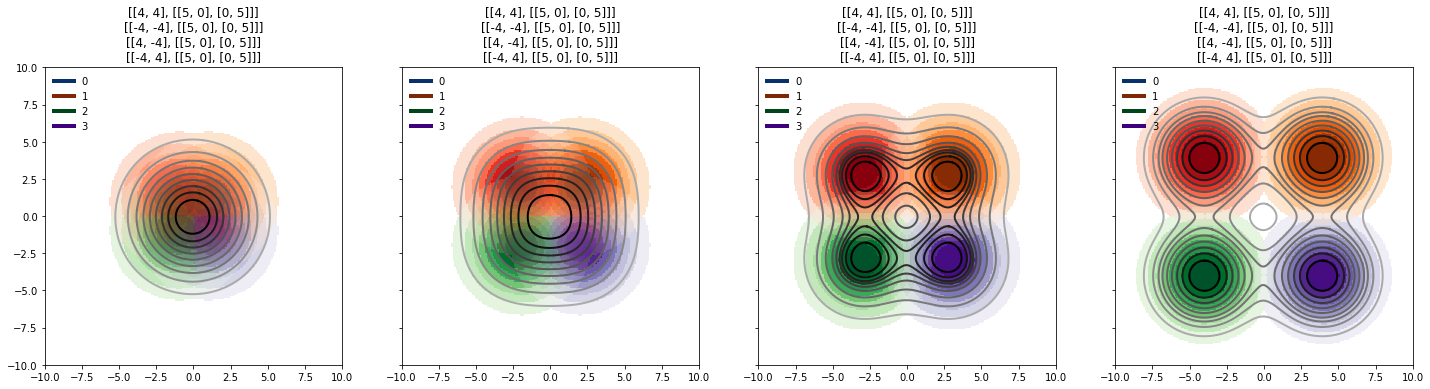

In [10]:
picture_worker.plot_images(images_overlapping, gaussians, z_sums, color_codes)

['mu_x', 'variance_x', 'mu_y', 'variance_y']


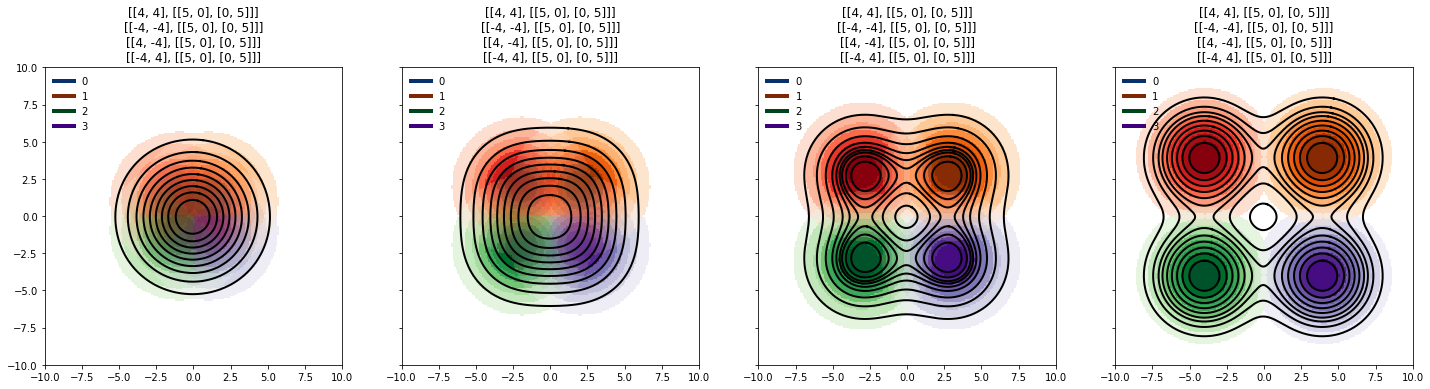

In [11]:
picture_worker.plot_images(images_overlapping, gaussians, z_sums, color_codes, contour_lines_weighted=False)